# Image Handling
The introduction of cell phones has made digital images a ubiqioutous object in everyone's life. Though some may long for the days of developed film, there are many benefits to switching to digital image processing. The goal of this notebook is to familiarize you with a hallmark of digital images: separating image color into separate digital channels.

Reliance on different colors to convey information is a standard practice in science. By understanding how colors are stored in an image and how we can manipulate the visualization of those colors, we will be able to simulate different spectroscopic practices and eventually combine these with a home-built Raspberry Pi instrument.

In [16]:
# Imports and settings to make the rest of the notebook work. Don't worry about changing these.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

from skimage.color import rgb2gray
from imageProc import *

ImportError: No module named cv2

Let's consider a familiar photo: the Astro's Logo!

![Go 'stros!](astros_logo.png)

The Astro's logo is built on the colors orange, blue, and white. However, that is not how our computers store that information. 

Two different color mapping strategies exist for rendering colors: RGB (red, green, blue) and CMYK (Cyan, Magenta, Yellow, and Black). 

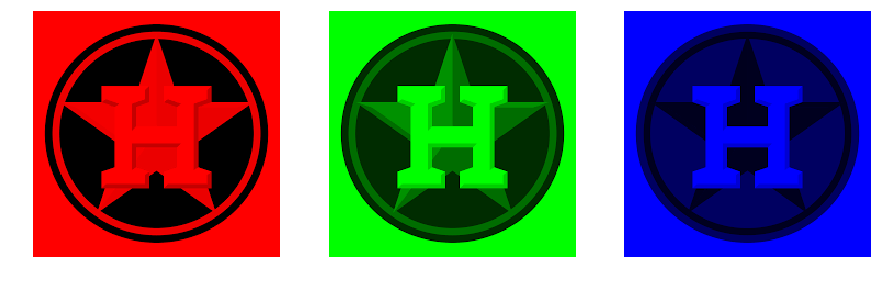

In [5]:
# This uses the matplotlib package to load in the Astros Logo as seen above.
im = plt.imread("astros_logo.png")

# Generate a figure and axes to graph the different versions of the Astro's Logo
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Iterate through all three color channels: Red, Green, and Blue
for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c] * 255 # Rescaled for .png's
    ax.imshow(tmp_im)
    ax.set_axis_off()

Equivalently, we can separate the logo into the Cyan, Magenta, and Yellow channels

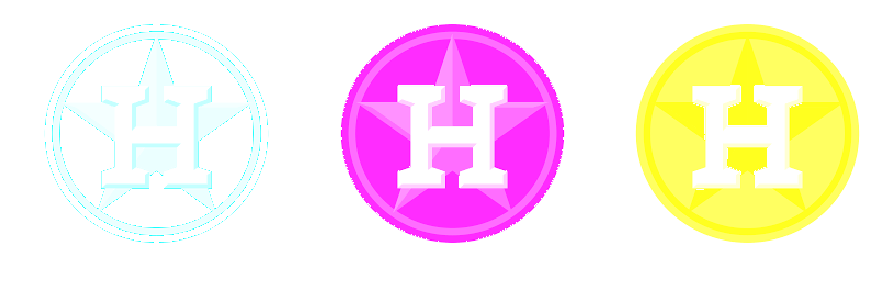

In [6]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), axs):
    tmp_im = np.zeros(im.shape, dtype="uint8")
    tmp_im[:,:,c] = im[:,:,c] * 255
    #Uncommenting reproduces CMY image channels
    tmp_im[tmp_im == 0] = 255
    ax.imshow(tmp_im)
    ax.set_axis_off()

Breaking pictures down into their subsequent color levels can help highlight details that are otherwise lost in the agglomeration of all colors. Our goal in science is often to isolate that desired bit of information (the "signal") from the rest of the photo (the "noise").

# Image Alterations
Digital images are simply matrices of numbers that are translated into colored pixel maps. Because of this simplicity, there are many types of programmatic alterations that we can make to an image. These types of image manipulations are commonplace in both science and other professions. Using computers we can:
- denoise (clear-up) a messy image
- hide one image inside of another
- put a fun filter on a picture of your dog.

Estimated Gaussian noise standard deviation = 0.128829055669


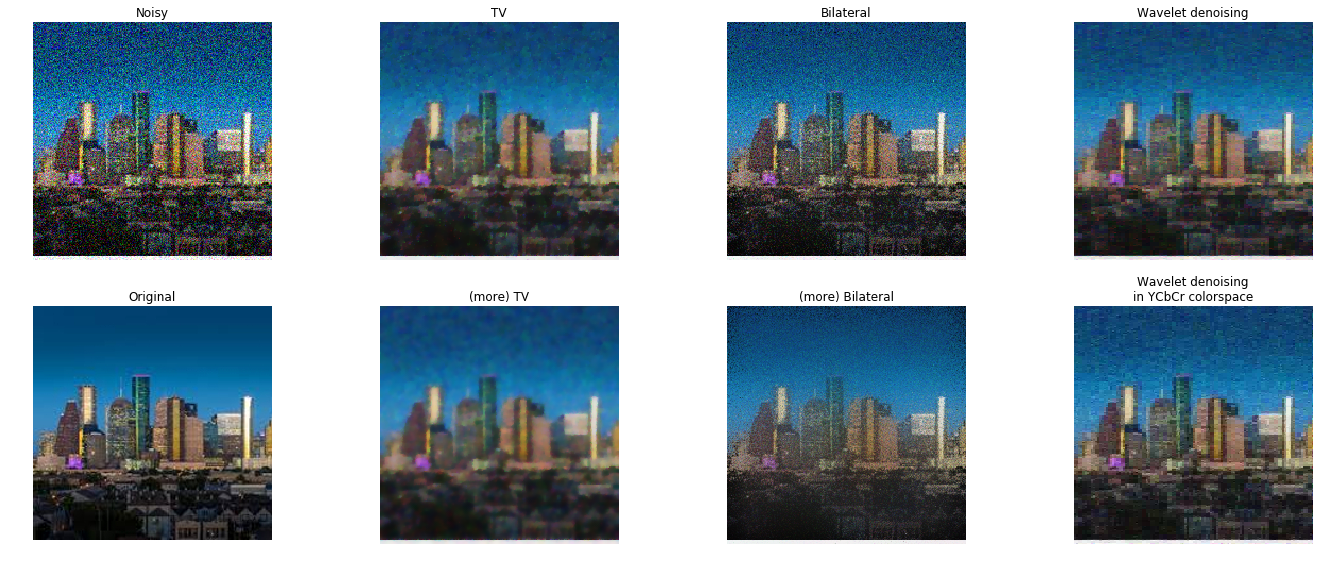

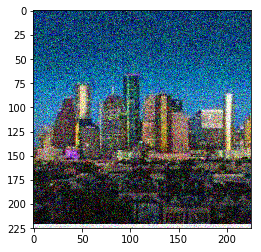

<Figure size 288x288 with 0 Axes>

In [22]:
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float
from skimage.util import random_noise


original = img_as_float(io.imread('./houston_skyline.jpeg'))

sigma = 0.155
noisy = random_noise(original, var=sigma**2)

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 8),
                       sharex=True, sharey=True)

plt.gray()
# Estimate the average noise standard deviation across color channels.
sigma_est = estimate_sigma(noisy, multichannel=True, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print("Estimated Gaussian noise standard deviation = {}".format(sigma_est))

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_color=0.05, sigma_spatial=15,
                multichannel=True))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')
ax[0, 3].imshow(denoise_wavelet(noisy, multichannel=True))
ax[0, 3].axis('off')
ax[0, 3].set_title('Wavelet denoising')

ax[1, 1].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) TV')
ax[1, 2].imshow(denoise_bilateral(noisy, sigma_color=0.1, sigma_spatial=15,
                multichannel=True))
ax[1, 2].axis('off')
ax[1, 2].set_title('(more) Bilateral')
ax[1, 3].imshow(denoise_wavelet(noisy, multichannel=True, convert2ycbcr=True))
ax[1, 3].axis('off')
ax[1, 3].set_title('Wavelet denoising\nin YCbCr colorspace')
ax[1, 0].imshow(original)
ax[1, 0].axis('off')
ax[1, 0].set_title('Original')

fig.tight_layout()

plt.show()

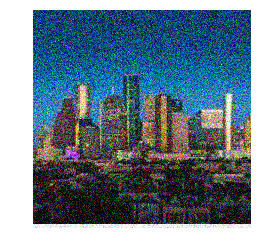

<Figure size 288x288 with 0 Axes>

In [23]:
fig = plt.figure(figsize = (4,4))
plt.imshow(noisy)
plt.savefig('noisy.pdf')
plt.axis('off')
fig= plt.figure(figsize = (4,4))

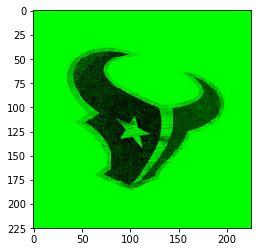

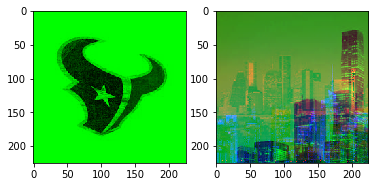

In [27]:
# Taking three images and blend them in the color channels
im1 = io.imread('./texans_logo.jpeg')
im2 = io.imread('./astros_logo.png')
im3 = io.imread('./houston_skyline.jpeg')



In [5]:
wavelengths = np.array([400, 430, 480, 520, 560, 600, 640])
print(wavelengths)
print("---------")

np_rgb = nm2rgb(wavelengths)
np_nm = rgb2nm(np_rgb)

print(np_rgb)
print(np_nm)
print("---------")

np_wsl = rgb2wsl(np_rgb[0,:])
print(np_wsl)

[400 430 480 520 560 600 640]
---------
[[  0.   0.   0.]
 [  0.   0. 255.]
 [  0.   0. 255.]
 [  0. 255.   0.]
 [  0. 255.   0.]
 [255.   0.   0.]
 [255.   0.   0.]]
[  0. 440. 440. 510. 510. 645. 645.]
---------
[0. 0. 0.]
[0.0, 0.0, array([0.])]


imageProc.py:123: RuntimeWarning: invalid value encountered in divide
  l = rgb2nm( (rgb - w)/s * INT_MAX)
/home/ldcbishop/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


IndexError: index 6 is out of bounds for axis 0 with size 6